In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [5]:
properties16 = pd.read_csv('../data/properties_2016.csv/properties_2016.csv', low_memory = False)
train = pd.read_csv("../data/train_2016_v2.csv/train_2016_v2.csv")



(90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [16]:
for c in properties16.columns:
    properties16[c]=properties16[c].fillna(-1)
    if properties16[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties16[c].values))
        properties16[c] = lbl.transform(list(properties16[c].values))

In [133]:
train_df = train.merge(properties16, how='left', on='parcelid')
print train_df.shape
train_df.head()

(90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-1.0,-1.0,2.0,3.0,-1.0,4.0,...,-1.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,-1.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,...,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-1.0,-1.000000e+00
2,12098116,-0.0040,2016-01-01,1.0,-1.0,-1.0,3.0,2.0,-1.0,4.0,...,-1.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,-1.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-1.0,-1.0,2.0,2.0,-1.0,4.0,...,-1.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,-1.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-1.0,-1.0,-1.0,2.5,4.0,-1.0,-1.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,-1.0,6.059042e+13


In [134]:
good_mask = (train_df['logerror'] >= np.percentile(train_df.logerror.values, 20)) & (train_df['logerror'] <= np.percentile(train_df.logerror.values, 70))
good_df = train_df[good_mask]
bad_df = train_df[~good_mask]
print good_df.shape
print bad_df.shape

(45662, 60)
(44613, 60)


In [135]:
train_df.loc[good_mask, 'label'] = 1
train_df.loc[~good_mask, 'label'] = 0
train_df.shape

(90275, 61)

In [136]:
train_df.shape

(90275, 61)

In [137]:
dropcol = ['parcelid', 'transactiondate', 'logerror']
train_df.drop(dropcol, axis=1, inplace=True)
train_df.shape

(90275, 58)

In [138]:
MISSING = True

In [139]:
if MISSING:
    cols = ['taxamount', \
        'taxvaluedollarcnt', 'structuretaxvaluedollarcnt']
    cols.append('label')
    for col in train_df:
        if col not in cols:
            del train_df[col]
    print train_df.shape

(90275, 4)


In [140]:
x_train = train_df.drop(['label'], axis=1)
x_train.shape

(90275, 3)

In [120]:
pca = PCA(n_components=5)

In [121]:
x_trans = pca.fit_transform(x_train)
x_trans.shape

(90275, 5)

In [141]:
from sklearn import preprocessing
x_trans = preprocessing.scale(x_train)

In [142]:
train_df['label'].values[:10]

array([ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.])

In [143]:
x_trans = pd.DataFrame(x_trans)

In [144]:
x_trans['label'] = train_df['label']
print x_trans.shape
x_trans.head()

(90275, 4)


,0,1,2,label
0,-0.270706,-0.175709,0.110005,1.0
1,0.799578,0.230431,0.609676,0.0
2,-0.561405,-0.608711,0.804368,1.0
3,-0.037401,-0.383484,-0.429146,1.0
4,-0.046702,-0.041660,-0.072325,1.0


In [147]:
x_trans.columns = ['com_1', 'com_2','com_3', 'label']
x_trans.head()

,com_1,com_2,com_3,label
0,-0.270706,-0.175709,0.110005,1.0
1,0.799578,0.230431,0.609676,0.0
2,-0.561405,-0.608711,0.804368,1.0
3,-0.037401,-0.383484,-0.429146,1.0
4,-0.046702,-0.041660,-0.072325,1.0


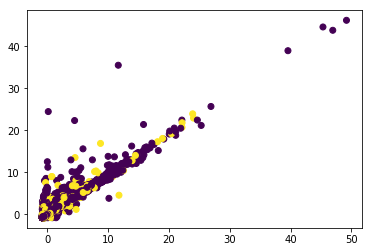

In [150]:
import matplotlib.pyplot as plt
plt.scatter(x_trans['com_2'].values, x_trans['com_3'].values, c=x_trans['label'])
plt.legend()
plt.show()